# Homework2

## Importing the datasets

In [1]:
# Import some useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy.stats import ttest_ind, levene, spearmanr

# To show numeric values and plots in a clear format
pd.options.display.float_format = '{:,.2f}'.format
warnings.filterwarnings("ignore")

# Set styles for the plots
sns.set_style('darkgrid')
sns.set_context('talk')

In [4]:
d_loc = pd.read_csv(r"C:\Users\carol\Desktop\Uni\I Anno\I Semestre\ADM\HW2\instagram_locations.csv", delimiter = '\t')

In [5]:
d_prof = pd.read_csv(r"C:\Users\carol\Desktop\Uni\I Anno\I Semestre\ADM\HW2\instagram_profiles.csv", delimiter = '\t')

Per caricare dataset grande

For instagram_posts, which is a very big dataset, I use the chunking technique

This technique allows to keep in memory smaller subset of data and therefore to analyse the entire dataset. The size of our desired chunk is specified using the pd.read_csv method. After the phase of preprocessing on each chunk, we can concatenate it to create the final dataset where we do the analysis.

The preprocessing phase consists in converting the types of each column to types that are smaller in dimension, and to select a subset of columns. This preprocesssing has the goal to make all the analysis efficiently.

In [44]:
# Given the huge dimension of the dataset, we analyse it in chunks doing preprocessing
def chunking():
    chunk_iterator = pd.read_csv(r"C:\Users\carol\Desktop\Uni\I Anno\I Semestre\ADM\HW2\instagram_posts.csv", delimiter = '\t', chunksize = 100000) 
                                 #parse_dates = ['cts'], 
                                 #date_parser = dateparse
    chunk_list = []  
    for chunk in chunk_iterator:  
        output = filtered_chunk(chunk)
        chunk_list.append(output)
    preprocessed_data = pd.concat(chunk_list)
    return preprocessed_data

# [RQ1] **EDA**

### Instagram_locations dataset

In [7]:
# To display the first 5 rows
d_loc.head()

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.14,38.97,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.47,47.87,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.33,27.70,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.38,48.83,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.34,34.15,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703


In [8]:
#To display the last 5 rows
d_loc.tail()

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
1022653,719973,873926439475785,Baby Season,Suarez de Figueroa # 380,NaN,"Santa Cruz de la Sierra, Bolivia",NaN,BO,69118383,False,...,Santa Cruz de la Sierra,santa-cruz-de-la-sierra,BO,Bolivia,-63.19,-17.79,babyseason.srl,baby-season,NaN,2019-05-29 01:20:57.078
1022654,719975,390707529,Cueva Carvajal,NaN,NaN,NaN,NaN,NaN,+52 81 2089 7776,NaN,...,NaN,NaN,NaN,NaN,-100.36,25.65,CuevaCarvajalBrewPub,cueva-carvajal,http://www.cuevacarvajal.mx,2019-05-29 01:21:04.434
1022655,719977,1205466612894741,The Cheesecake Factory,304 Orland Square Dr,60462,"Orland Park, Illinois",NaN,US,(708) 873-3747,False,...,Manor Homes,manor-homes,US,United States,-87.84,41.62,NaN,the-cheesecake-factory,http://locations.thecheesecakefactory.com/il/o...,2019-05-29 01:21:13.404
1022656,719979,286794844,Plimmer Towers,2 Gilmer Terrace,NaN,"Wellington, New Zealand",NaN,NZ,NaN,False,...,NaN,NaN,NaN,NaN,174.78,-41.29,NaN,plimmer-towers,NaN,2019-05-29 01:21:21.628
1022657,720678,554330673,Старые Бирюли,Северная улица,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,49.44,55.98,NaN,NaN,NaN,2019-05-29 02:07:00.772


In [9]:
#To check the data type
d_loc.dtypes

sid                         int64
id                          int64
name                       object
street                     object
zip                        object
city                       object
region                     object
cd                         object
phone                      object
aj_exact_city_match        object
aj_exact_country_match     object
blurb                      object
dir_city_id                object
dir_city_name              object
dir_city_slug              object
dir_country_id             object
dir_country_name           object
lat                       float64
lng                       float64
primary_alias_on_fb        object
slug                       object
website                    object
cts                        object
dtype: object

In [10]:
#Total number of rows and columns
d_loc.shape

(1022658, 23)

In [11]:
# Rows containing duplicate data
duplicate_rows_dloc = d_loc[d_loc.duplicated()]
print("Number of duplicate rows:", duplicate_rows_dloc.shape)

Number of duplicate rows: (0, 23)


There are no duplicate rows, so we have nothing to drop

In [12]:
#Dropping irrelevant columns (have to decide which ones)
#d_loc = d_loc.drop(['phone', 'aj_exact_city_match', 'aj_exact_country_match', 'blurb', 'website'], axis=1)

Text(0.5, 0, 'Location')

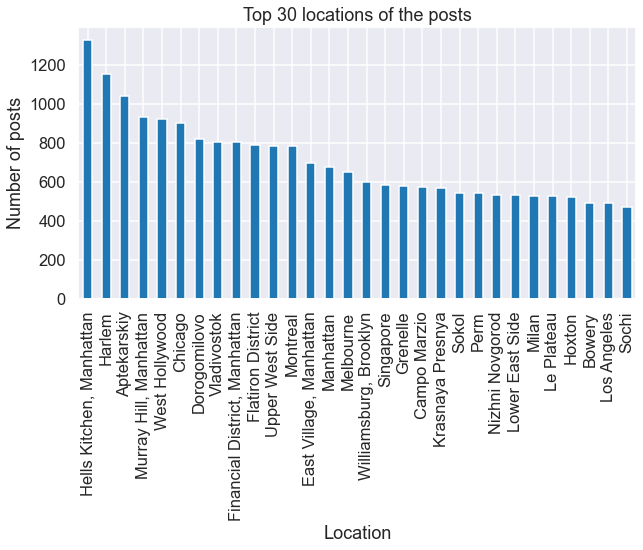

In [26]:
# Plotting an histogram with the top 30 locations
d_loc.dir_city_name.value_counts().nlargest(30).plot(kind='bar', figsize=(10,5))
plt.title("Top 30 locations of the posts")
plt.ylabel('Number of posts')
plt.xlabel('Location')

### Instagram_profiles dataset

In [15]:
d_prof.head()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,"4,721,049,632.00",jphillip033,John Pierce,"""Document Everything Always""",250.00,146.00,170.00,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,"590,583,002.00",mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.00,"1,145.00","2,878.00",www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,"1,074,146,658.00",yellowlightbreen,Eliza Gray,Maine is for Lovers,469.00,324.00,431.00,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,"1,472,038,842.00",tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,"3,531,420,803.00",luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN


In [16]:
d_prof.tail()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
4509581,4184467,"1,418,322,351.00",karenarkesteyn,Karen Arkesteyn,🙏🏻,468.00,481.00,497.00,NaN,2019-08-01 14:40:26.554 -0400,False
4509582,4184469,"13,407,035.00",jornvlaeminck,Jorn Vlaeminck,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:41.628 -0400,NaN
4509583,4184470,"6,007,353,778.00",s_degol,Sanne Degol,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:42.983 -0400,NaN
4509584,4184473,"23,389,895.00",anwilms,An Wilms,Fashion - travel - photography ... that's me!👗...,504.00,153.00,183.00,NaN,2019-08-01 14:40:49.982 -0400,False
4509585,4184511,"2,088,094,437.00",arnaubassols_,Arnau Bassols Noguer,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:42:30.055 -0400,NaN


In [17]:
#To check the data type
d_prof.dtypes

sid                      int64
profile_id             float64
profile_name            object
firstname_lastname      object
description             object
following              float64
followers              float64
n_posts                float64
url                     object
cts                     object
is_business_account     object
dtype: object

In [18]:
#Total number of rows and columns
d_prof.shape

(4509586, 11)

In [19]:
# Rows containing duplicate data
duplicate_rows_dprof = d_prof[d_prof.duplicated()]
print("Number of duplicate rows:", duplicate_rows_dprof.shape)

Number of duplicate rows: (0, 11)


There are no duplicate rows, so we have nothing to drop

In [20]:
#Dropping irrelevant columns (have to decide which ones)
#d_loc = d_loc.drop(['phone', 'aj_exact_city_match', 'aj_exact_country_match', 'blurb', 'website', ''], axis=1)

Text(0.5, 0, 'Account')

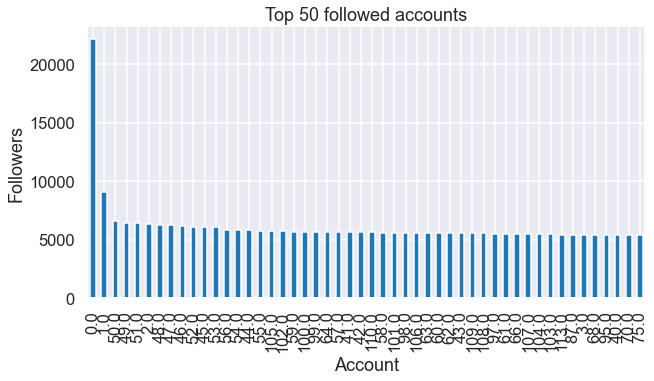

In [21]:
#Plot with the top 50 account with the most followers
d_prof.followers.value_counts().nlargest(50).plot(kind='bar', figsize=(10,5))
plt.title("Top 50 followed accounts")
plt.ylabel('Followers')
plt.xlabel('Account')

Text(0.5, 0, 'Account')

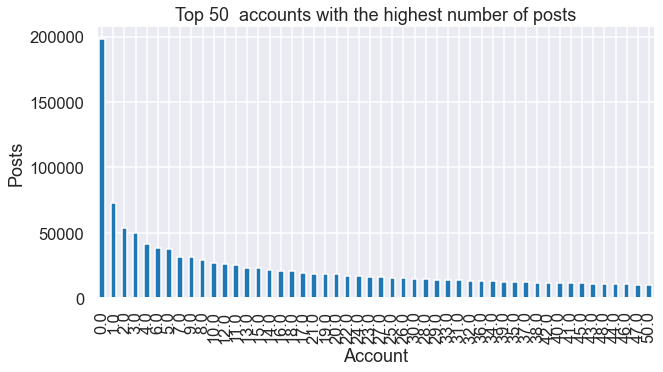

In [22]:
#Plot with the top 50 account with the highest number of posts
d_prof.n_posts.value_counts().nlargest(50).plot(kind='bar', figsize=(10,5))
plt.title("Top 50  accounts with the highest number of posts")
plt.ylabel('Posts')
plt.xlabel('Account')

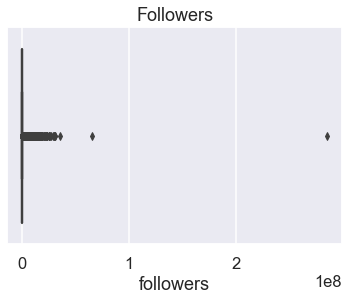

In [27]:
#Boxplot for the variables
#Followers
sns.boxplot(x = 'followers', data = d_prof).set_title('Followers')
plt.show()

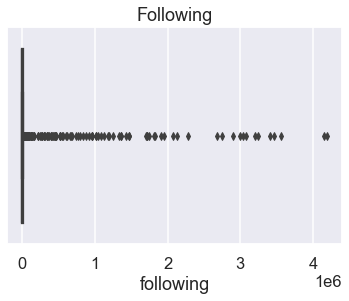

In [28]:
#Following
sns.boxplot(x = 'following', data = d_prof).set_title('Following')
plt.show()

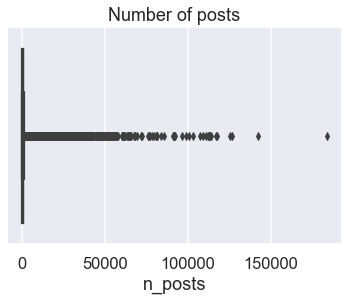

In [29]:
#Number of posts
sns.boxplot(x = 'n_posts', data = d_prof).set_title('Number of posts')
plt.show()

### Instagram_posts dataset

In [60]:
#it checks if two rows are identical
def DuplicateRows(data):
    return data.duplicated(keep='first') 

# it returns names' columns
def columns_names(data):
    return data.columns

# it returns 5 first rows
def First5Rows(data):
    return data.head()

# it returns 5 last rows
def Last5Rows(data):
    return data.tail()

# it returns infos about the types
def TypesColumns(data):
    return data.info()

# it returns some stats about numeric type fields
def Stats_Numeric_field(data):
    return data[['profile_id', 'post_id', 'location_id', 'cts', 'post_type', 'numbr_likes', 'number_comments']].describe()

In [46]:
# It parses the timestamps, returning a datetime format
#def dateparse(timestamp):
    #return pd.to_datetime(timestamp,unit="s")

In [98]:
# Loading the first 10000000 rows of the dataset, to get basics information about it.
d_posts = pd.read_csv(r"C:\Users\carol\Desktop\Uni\I Anno\I Semestre\ADM\HW2\instagram_posts.csv", delimiter = '\t', nrows = 10000000)

In [99]:
# To get columns' types
TypesColumns(posts_dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   sid              100000 non-null  int64 
 1   sid_profile      100000 non-null  int64 
 2   post_id          100000 non-null  object
 3   profile_id       100000 non-null  int64 
 4   location_id      100000 non-null  int64 
 5   cts              100000 non-null  object
 6   post_type        100000 non-null  int64 
 7   description      91905 non-null   object
 8   numbr_likes      100000 non-null  int64 
 9   number_comments  100000 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 7.6+ MB


In [100]:
# It returns a DataFrame reducing the data to the numeric columns
#def filtered_chunk(data):
    
    # We set the column type in order to reduce their dimension
    # They're all 'int32' or 'float32' except 'app_id' and 'author.steamid' that are numbers bigger than 32 bits,
    # so we set 'int64'.
    #types_diz = {'app_id':'int64', 'author.steamid':'int64',
                 #'votes_helpful':'int32', 'votes_funny':'int32',
                 #'weighted_vote_score':'float32', 'comment_count':'int32',
                 #'author.num_games_owned':'int32', 'author.num_reviews':'int32'
                #}
    
    # Subset the columns we need from our dataset 
    #columns = ['sid', 'sid_profile', 'post_id', 'profile_id', 'location_id', 'cts', 'post_type', 'numbr_likes', 'number_comments']
    
    # We decided to delete all the rows with at least one NA value, instead of assign a default value
    # We subset the column, drop the NA and finally convert the types
    #db = data[columns]
    #return db

In [101]:
# We start creating the preprocessed data 
#preprocessed_data = chunking()

In [102]:
#print("The dataset has", len(preprocessed_data[""]), 'rows.')

In [103]:
# To get the columns names.
columns_names(d_posts)

Index(['sid', 'sid_profile', 'post_id', 'profile_id', 'location_id', 'cts',
       'post_type', 'description', 'numbr_likes', 'number_comments'],
      dtype='object')

In [104]:
# To check if there are duplicate rows
DuplicateRows(d_posts)

0          False
1          False
2          False
3          False
4          False
           ...  
9999995    False
9999996    False
9999997    False
9999998    False
9999999    False
Length: 10000000, dtype: bool

In [105]:
# To get columns' types
TypesColumns(d_posts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   sid              int64  
 1   sid_profile      int64  
 2   post_id          object 
 3   profile_id       float64
 4   location_id      float64
 5   cts              object 
 6   post_type        int64  
 7   description      object 
 8   numbr_likes      int64  
 9   number_comments  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 762.9+ MB


In [106]:
# Plot the first 5 rows
First5Rows(d_posts)

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,"2,237,947,779.00","1,022,366,247,837,915.00",2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0
1,28370932,-1,BVg0pbolYBC,"5,579,335,020.00","457,426,771,112,991.00",2017-06-19 09:31:16.000,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25,1
2,28370933,-1,BRgkjcXFp3Q,"313,429,634.00","457,426,771,112,991.00",2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9,0
3,28370934,-1,BKTKeNhjEA7,"1,837,592,700.00","457,426,771,112,991.00",2016-09-13 16:27:16.000,1,#teatime #scorpion #friends #love #mountains #...,4,0
4,28370935,-1,8-NQrvoYLX,"1,131,527,143.00","457,426,771,112,991.00",2015-10-18 10:19:27.000,1,thE sky gavE mE a #constEllation,8,0


In [107]:
# Plot the last 5 rows
Last5Rows(d_posts)

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
9999995,38024868,3705511,BzXNdc9AR28,"3,929,045,419.00","601,835,797,000,479.00",2019-07-01 07:37:30.000,1,Привет! Всем доброго понедельника и прекрасной...,44,1
9999996,26045402,3705536,BZB3A89jU0L,"206,772,270.00","273,715,569.00",2017-09-14 19:01:04.000,1,Urban #squirrel #thuglife #se1 #london,80,1
9999997,38024735,3705498,BzEbsb0pVK_,"16,414,251.00","53,680.00",2019-06-24 00:36:18.000,1,"Barbican Estate, London.\n#barbican #barbicane...",11,0
9999998,38024744,3705498,BzA6rn2JrrN,"16,414,251.00","219,305,490.00",2019-06-22 15:50:07.000,1,Winchester Cathedral at sunset\n#winchester #w...,12,0
9999999,38024753,3705498,By3J2P-pkUO,"16,414,251.00","26,328.00",2019-06-18 20:50:14.000,1,‪Had such a good time last night seeing @ogiku...,7,3


In [108]:
# To get stats from numeric field
Stats_Numeric_field(d_posts)

,profile_id,location_id,post_type,numbr_likes,number_comments
count,"9,987,505.00","9,682,259.00","10,000,000.00","10,000,000.00","10,000,000.00"
mean,"3,192,009,356.91","296,160,132,237,569.38",1.06,279.31,7.03
std,"49,455,918,219.82","566,083,588,517,565.62",0.23,"5,112.20",160.73
min,3.00,10.00,1.00,0.00,0.00
25%,"303,779,406.00","262,403,601.00",1.00,19.00,0.00
50%,"1,638,555,295.00","780,342,364.00",1.00,46.00,1.00
75%,"5,449,228,358.00","299,693,270,880,510.00",1.00,122.00,5.00
max,"90,010,135,311,447.00","24,021,480,757,865,152.00",3.00,"3,586,546.00","189,888.00"


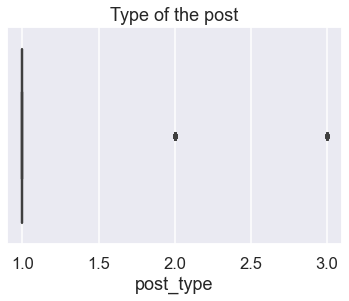

In [109]:
#Plot post type
sns.boxplot(x = 'post_type', data = d_posts).set_title('Type of the post')
plt.show()

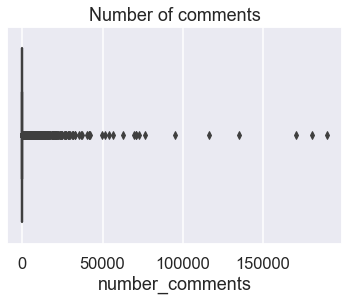

In [110]:
#Plot number of comments
sns.boxplot(x = 'number_comments', data = d_posts).set_title('Number of comments')
plt.show()

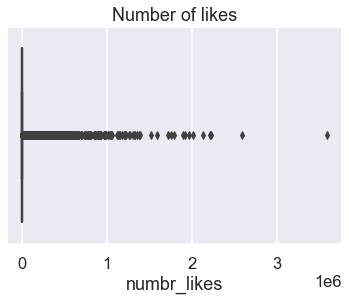

In [111]:
#Plot number of likes
sns.boxplot(x = 'numbr_likes', data = d_posts).set_title('Number of likes')
plt.show()

Text(0.5, 0, 'Post')

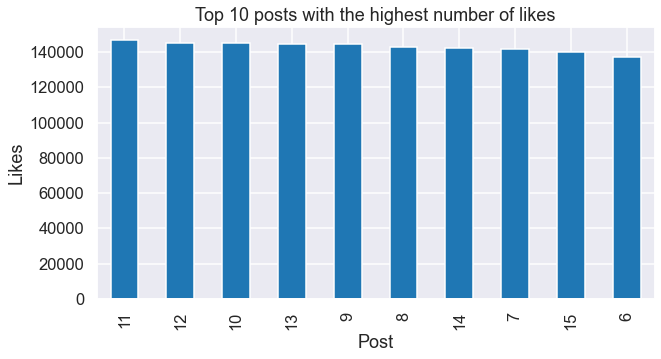

In [112]:
#Top 10 posts with the most likes
d_posts.numbr_likes.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 posts with the highest number of likes")
plt.ylabel('Likes')
plt.xlabel('Post')

Text(0.5, 0, 'Post')

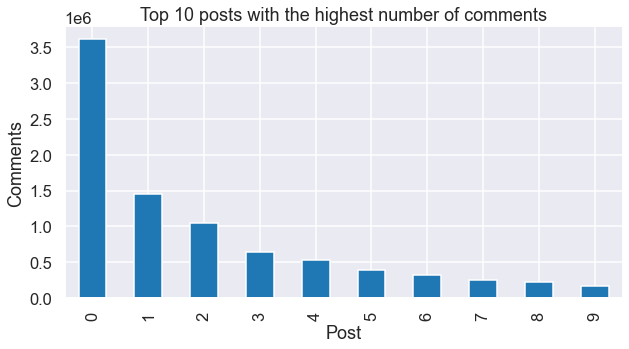

In [113]:
#Top 10 posts with the most comments
d_posts.number_comments.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 posts with the highest number of comments")
plt.ylabel('Comments')
plt.xlabel('Post')

# [RQ2]

### Plot the number of posts for each profile in descending order

<AxesSubplot:>

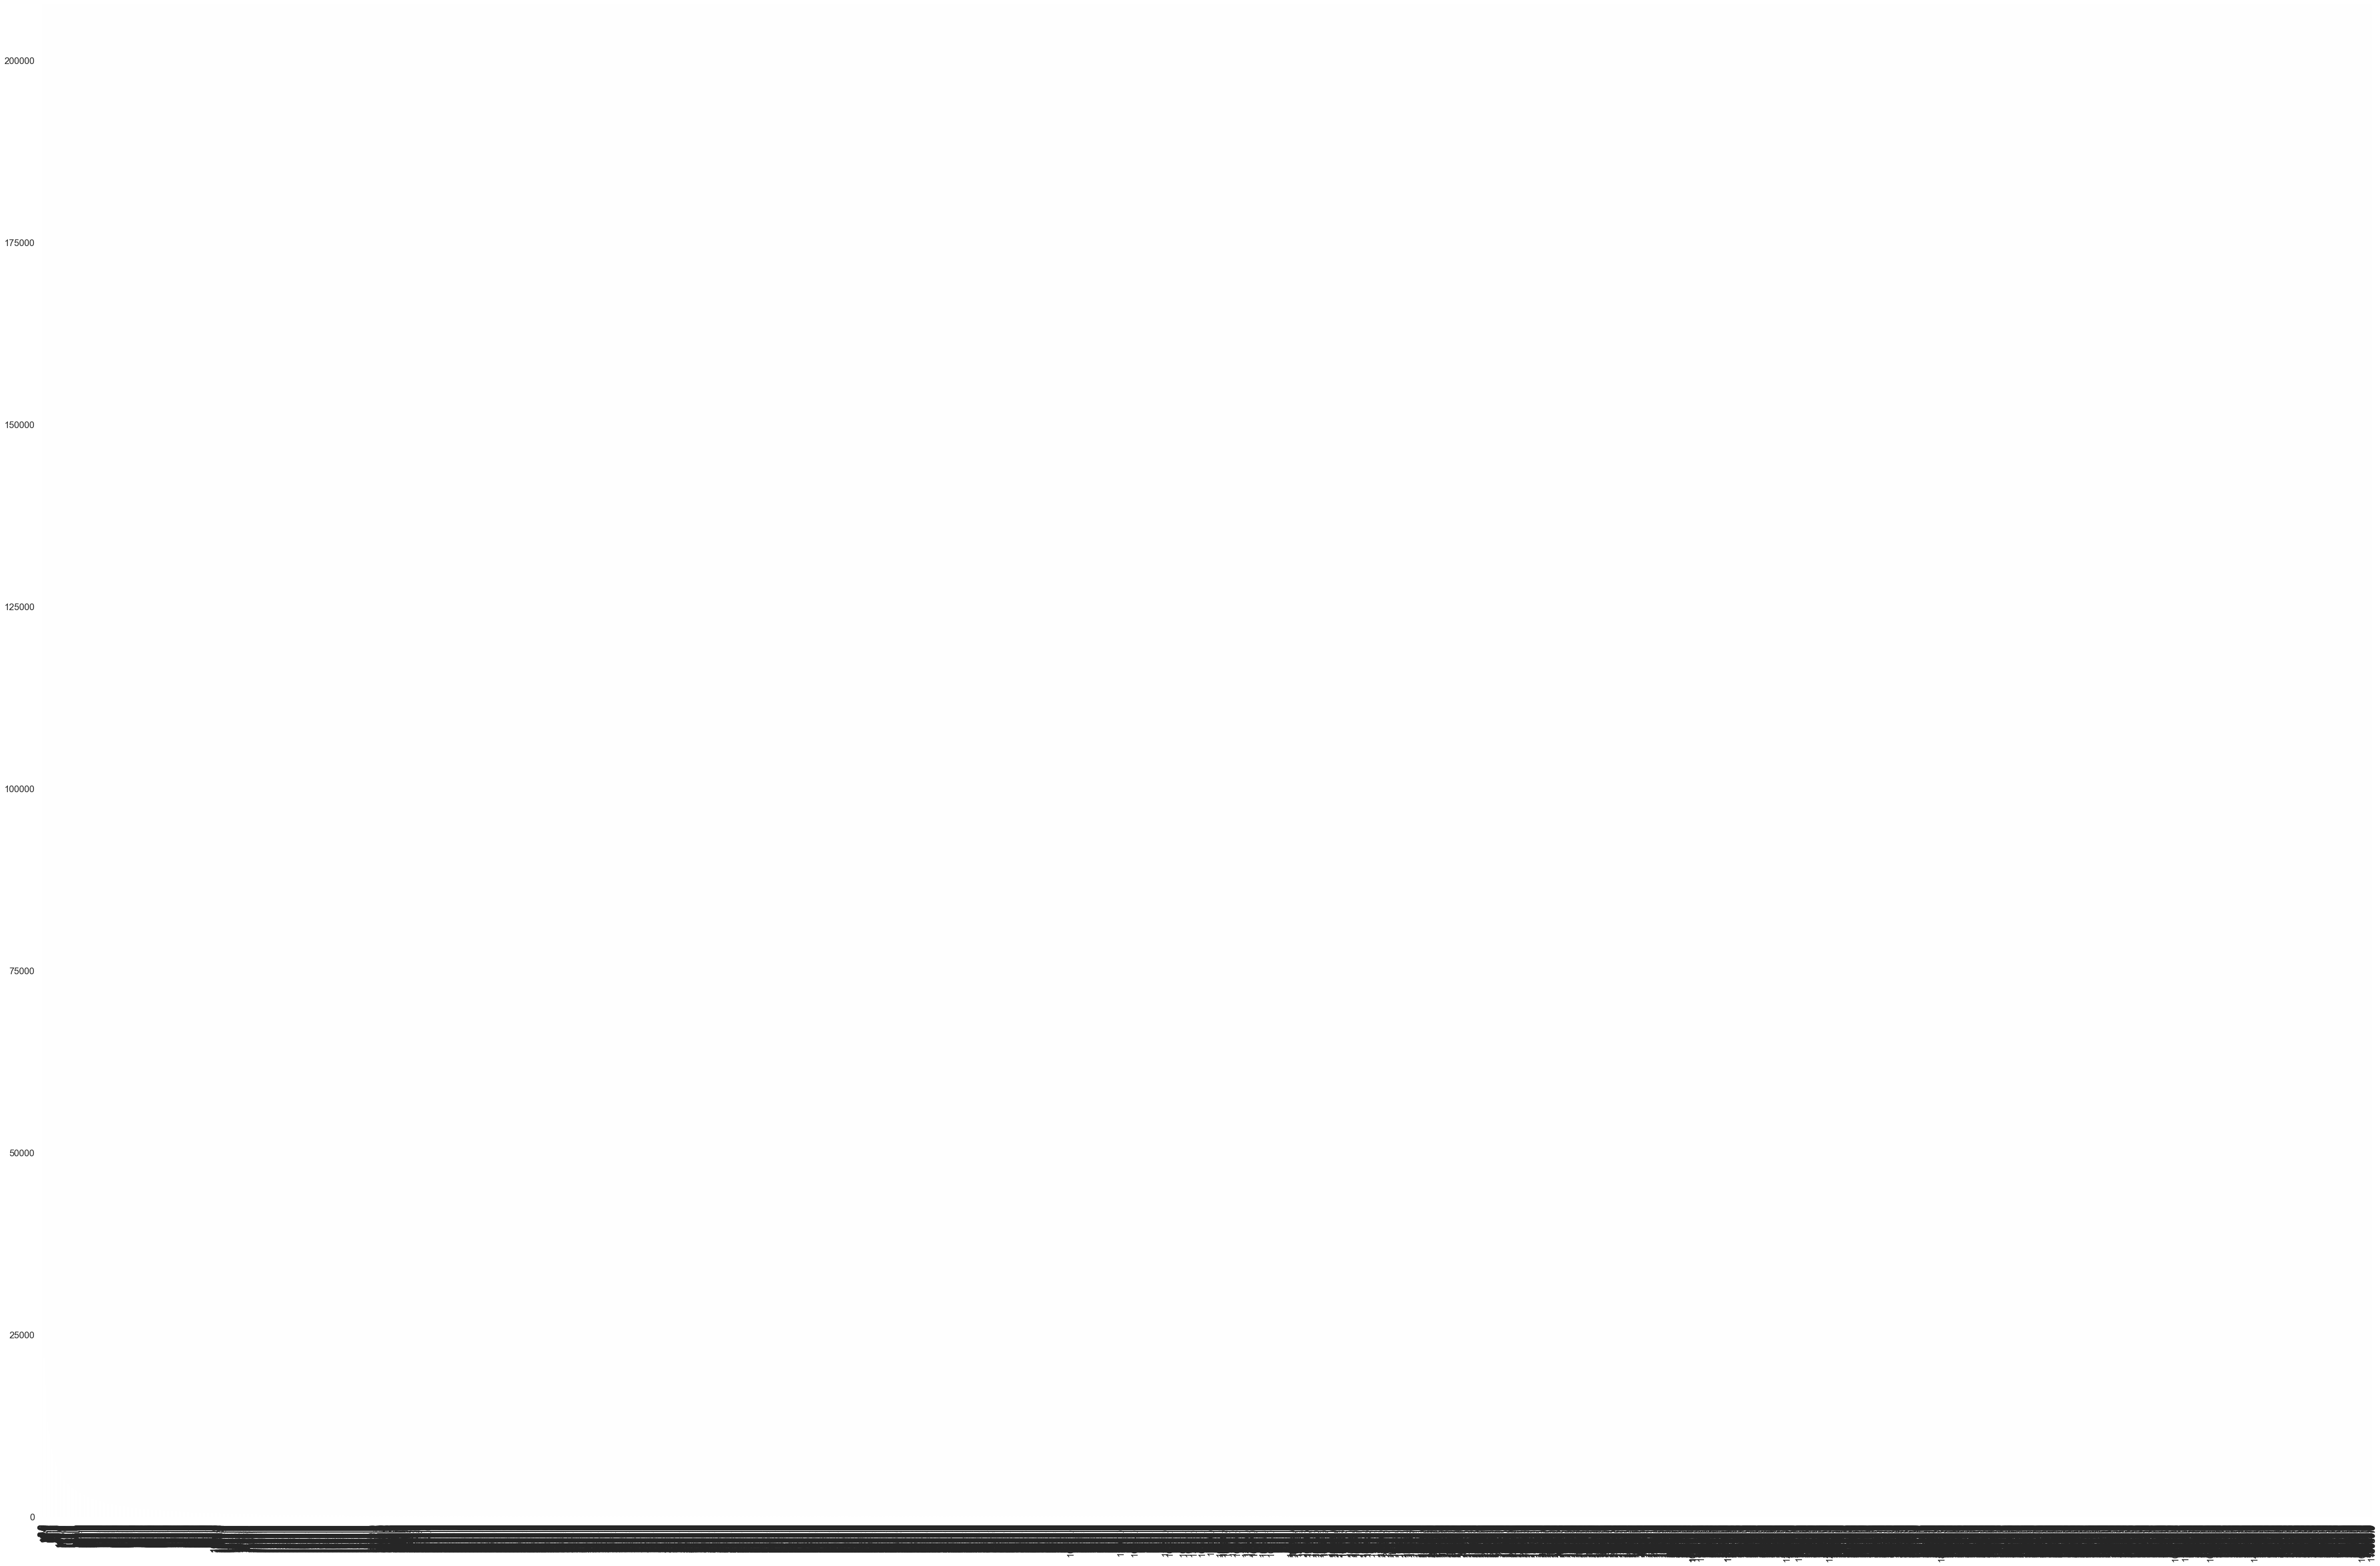

In [123]:
#Plot the number of posts for each profile in descending order
d_prof['n_posts'].value_counts().plot.bar(figsize = (75,50))

Text(0.5, 0, 'Profile')

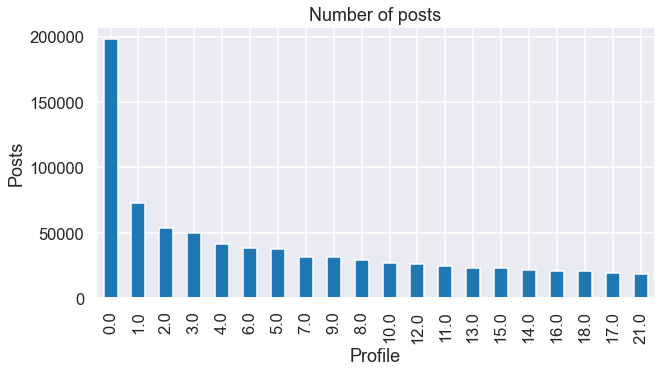

In [118]:
#First 20 profiles
d_prof.n_posts.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("Number of posts")
plt.ylabel('Posts')
plt.xlabel('Profile')

### What posts have the highest number of "likes"?

In [ ]:
#What posts have the highest number of "likes"?

In [ ]:
#First 20 posts

### What posts have the most and the least number of comments?